In [1]:
import pandas as pd

# import polyclonal

import dms_variants
import dms_variants.codonvarianttable
from dms_variants.constants import CBPALETTE
import dms_variants.plotnine_themes

from plotnine import *

_ = theme_set(dms_variants.plotnine_themes.theme_graygrid())

import os
os.chdir('../')

In [2]:
import altair as alt
import yaml

In [3]:
prob_escape_csv = "results/prob_escape/libA_221021_1_5G04_1_prob_escape.csv"

prob_escape = pd.read_csv(
    prob_escape_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape.notnull().all().all()

In [4]:
import re
pat = r'[A-Z]160[A-Z]'

mut160 = prob_escape[prob_escape.aa_substitutions_reference.str.contains(pat)]
mut160
# mut160 = mut160.loc[mut160['prob_escape'] >0.1]
# mut160.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
32,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,K140I Y178R T179Q Q216F S217P Q330W I354M,7,ATACTTGCCATTCATA,0.0094,0.0094,4611,38460,368181,28860,16889978,34,K121I Y159R T160Q Q197F S198P Q311W I335M,5G04,24.0
54,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,T179R D209I I211L S238L,4,TGTAAAGTTTTTACGC,1.0000,1.8373,2133,91,368181,28860,16889978,34,T160R D190I I192L S219L,5G04,24.0
233,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,T31V S126N S162E T179N N401G A495V L535I,7,GATCTTTTACTCGTTG,0.0007,0.0007,265,29186,368181,28860,16889978,34,T12V S107N S143E T160N N382G A476V L516I,5G04,24.0
241,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,G81E S110N R111K K140N K154T F156S S163K Y178S...,13,TATACGTTAATAAATG,0.0484,0.0484,258,418,368181,28860,16889978,34,G62E S91N R92K K121N K135T F137S S144K Y159S T...,5G04,24.0
269,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,T31I T179S F277Y,3,TTAGTCATGAATTTAG,0.0013,0.0013,229,13929,368181,28860,16889978,34,T12I T160S F258Y,5G04,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332477,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,S143K Y178H T179D I211N R288K D394N,6,TTTCCCATTGCTAGGA,0.0000,0.0000,0,38,90974,28860,16889978,34,S124K Y159H T160D I192N R269K D375N,5G04,1.5
332515,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,G97D Y178L T179V D512R,4,TTTCGGCACAAAGAAA,0.0000,0.0000,0,48,90974,28860,16889978,34,G78D Y159L T160V D493R,5G04,1.5
332520,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,T179M Q330R I350M,3,TTTCGTAAGCGCGCTA,0.0000,0.0000,0,58,90974,28860,16889978,34,T160M Q311R I331M,5G04,1.5
332537,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,T179R K226M R239C Q375L,4,TTTCTAGACGCGAAGC,0.0000,0.0000,0,36,90974,28860,16889978,34,T160R K207M R220C Q356L,5G04,1.5


In [7]:
mut160 = mut160.loc[mut160['n_aa_substitutions'] == 2]

mut160_siteb = mut160[mut160.aa_substitutions_reference.str.contains(site_b_pat)]
mut160_siteb

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
677,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,Y178K T179K,2,CCTAGCGATTCGCGCC,0.0027,0.0027,77,2272,368181,28860,16889978,34,Y159K T160K,5G04,24.0
1853,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,Y178G T179F,2,ATCCAGGTTATAAAAC,0.0045,0.0045,33,581,368181,28860,16889978,34,Y159G T160F,5G04,24.0
3217,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,Y178G T179R,2,AAAAAATATACGTCGA,0.0043,0.0043,20,368,368181,28860,16889978,34,Y159G T160R,5G04,24.0
3547,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,T179S K208I,2,GCGTCAGAATAAAAAA,0.0025,0.0025,18,556,368181,28860,16889978,34,T160S K189I,5G04,24.0
5432,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,Y178K T179A,2,AGATCTTACCTGAAGG,0.0140,0.0140,12,67,368181,28860,16889978,34,Y159K T160A,5G04,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311631,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,Y178M T179R,2,CTCCAAGGGTCCTGTG,0.0000,0.0000,0,46,90974,28860,16889978,34,Y159M T160R,5G04,1.5
311820,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,Y178Q T179F,2,CTCGTGCATCCTGATC,0.0000,0.0000,0,57,90974,28860,16889978,34,Y159Q T160F,5G04,1.5
313557,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,T179Q K208R,2,GAACGAAGCTAGTGGC,0.0000,0.0000,0,37,90974,28860,16889978,34,T160Q K189R,5G04,1.5
318923,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,Y178* T179L,2,GGTCAGGGGACGAGCT,0.0000,0.0000,0,87,90974,28860,16889978,34,Y159* T160L,5G04,1.5


In [8]:
site_b_residues = [
    155, 156, 157, 158, 159,
    186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198    
]

In [6]:
site_b_pat = r'[A-Z]15[5-9]|18[6-9]|19[0-8][A-Z]'
mut_site_b = prob_escape[prob_escape.aa_substitutions_reference.str.contains(site_b_pat)]

mut_site_b_single = mut_site_b.loc[mut_site_b['n_aa_substitutions'] == 1]
mut_site_b_single

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
12,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,G205P,1,CCTATTATGAGATATC,1.0000,1.2686,9484,586,368181,28860,16889978,34,G186P,5G04,24.0
15,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,G205P,1,CGGTTTTGTACAAGAA,1.0000,1.5124,7814,405,368181,28860,16889978,34,G186P,5G04,24.0
73,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,D209A,1,CCTTAGTGTAATAAAA,0.0016,0.0016,1674,83268,368181,28860,16889978,34,D190A,5G04,24.0
452,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,K208Q,1,TGTCCTGACGTGCACA,0.0021,0.0021,118,4451,368181,28860,16889978,34,K189Q,5G04,24.0
549,libA,221021_1_antibody_5G04_24.0_1,221021_1_no-antibody_control_1,T206N,1,TTTAAAAGAAAAGATA,0.0013,0.0013,95,5777,368181,28860,16889978,34,T187N,5G04,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331857,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,K208M,1,TTGCTCTAAAACTTTG,0.0000,0.0000,0,55,90974,28860,16889978,34,K189M,5G04,1.5
332143,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,Y178N,1,TTTAAACTGAAAGCAT,0.0000,0.0000,0,249,90974,28860,16889978,34,Y159N,5G04,1.5
332416,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,S212F,1,TTTCAAAAGTTAGATT,0.0000,0.0000,0,57,90974,28860,16889978,34,S193F,5G04,1.5
332539,libA,221021_1_antibody_5G04_1.5_1,221021_1_no-antibody_control_1,S217F,1,TTTCTAGTATCATTTC,0.0000,0.0000,0,85,90974,28860,16889978,34,S198F,5G04,1.5


In [8]:
siteb_alone = mut_site_b_single[['aa_substitutions_reference', 'barcode', 'prob_escape', 'antibody_concentration']]
siteb_alone['160_mut'] = False
siteb_alone

/tmp/ipykernel_8273/2336014006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,aa_substitutions_reference,barcode,prob_escape,antibody_concentration,160_mut
12,G186P,CCTATTATGAGATATC,1.0000,24.0,False
15,G186P,CGGTTTTGTACAAGAA,1.0000,24.0,False
73,D190A,CCTTAGTGTAATAAAA,0.0016,24.0,False
452,K189Q,TGTCCTGACGTGCACA,0.0021,24.0,False
549,T187N,TTTAAAAGAAAAGATA,0.0013,24.0,False
...,...,...,...,...,...
331857,K189M,TTGCTCTAAAACTTTG,0.0000,1.5,False
332143,Y159N,TTTAAACTGAAAGCAT,0.0000,1.5,False
332416,S193F,TTTCAAAAGTTAGATT,0.0000,1.5,False
332539,S198F,TTTCTAGTATCATTTC,0.0000,1.5,False


In [9]:
siteb_160 = mut160_siteb[['aa_substitutions_reference', 'barcode', 'prob_escape', 'antibody_concentration']]
siteb_160['160_mut'] = True

/tmp/ipykernel_8273/2852393197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
site_160_epi = pd.concat([siteb_alone, siteb_160])
site_160_epi

,aa_substitutions_reference,barcode,prob_escape,antibody_concentration,160_mut
12,G186P,CCTATTATGAGATATC,1.0000,24.0,False
15,G186P,CGGTTTTGTACAAGAA,1.0000,24.0,False
73,D190A,CCTTAGTGTAATAAAA,0.0016,24.0,False
452,K189Q,TGTCCTGACGTGCACA,0.0021,24.0,False
549,T187N,TTTAAAAGAAAAGATA,0.0013,24.0,False
...,...,...,...,...,...
311631,Y159M T160R,CTCCAAGGGTCCTGTG,0.0000,1.5,True
311820,Y159Q T160F,CTCGTGCATCCTGATC,0.0000,1.5,True
313557,T160Q K189R,GAACGAAGCTAGTGGC,0.0000,1.5,True
318923,Y159* T160L,GGTCAGGGGACGAGCT,0.0000,1.5,True


/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


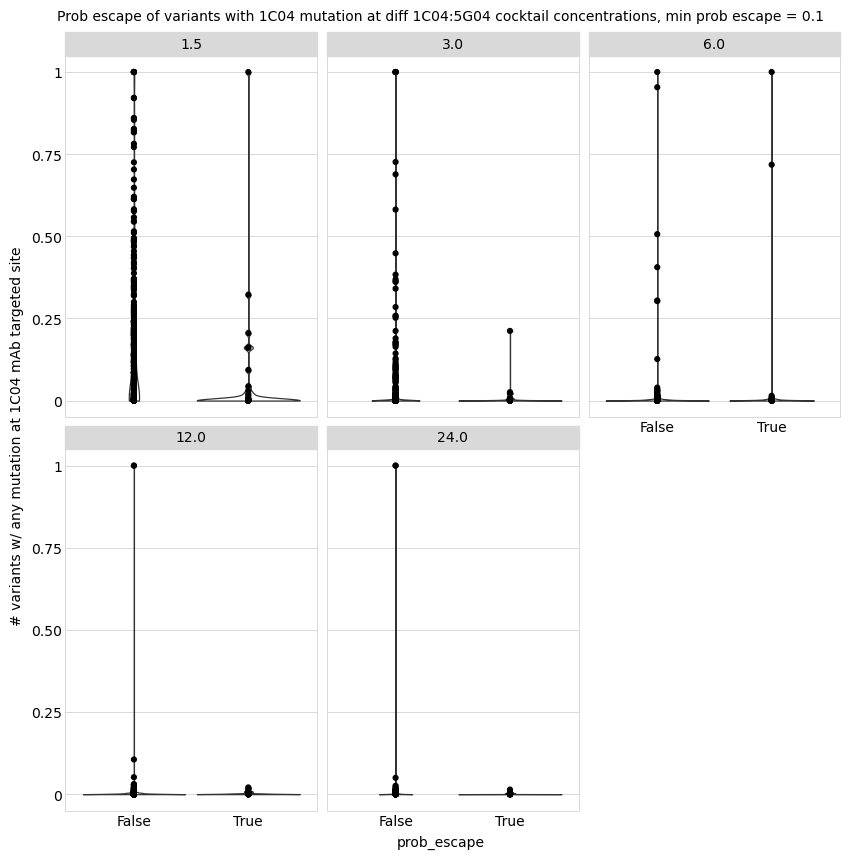

In [13]:
p = (
    ggplot(
        site_160_epi,
        aes(x='160_mut', y='prob_escape')) + 
    geom_violin() + 
    geom_point() +
    theme(figure_size=(10, 10),
         panel_grid_major_x=element_blank(),
         ) +
#     scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='prob_escape', 
         y='# variants w/ any mutation at 1C04 mAb targeted site',
         title='Prob escape of variants with 1C04 mutation at diff 1C04:5G04 cocktail concentrations, min prob escape = 0.1'
        )
) 

p = p + facet_wrap('~ antibody_concentration')

# p = p + facet_wrap('~ antibody_concentration', nrow = 6)
_ = p.draw()

In [ ]:
155,156,157,158,159,186,187,188,189,190,191,192,193,194,195,196,197,198